# Predicting Unified Parkinson’s Disease Rating Scale (UPDRS) Score using the Features of Speech Signal 
## By: Ashraf Eskandar Ali Al-aghbari (P113003)

In [1]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('D:/UKM/Data Science & Analytics/Machine Learning/Assignment2')

In [3]:
UPDRS = pd.read_table('UPDRS.txt', sep=',', header=None)

In [4]:
UPDRS.shape

(1040, 29)

In [5]:
UPDRS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1040 non-null   int64  
 1   1       1040 non-null   float64
 2   2       1040 non-null   float64
 3   3       1040 non-null   float64
 4   4       1040 non-null   float64
 5   5       1040 non-null   float64
 6   6       1040 non-null   float64
 7   7       1040 non-null   float64
 8   8       1040 non-null   float64
 9   9       1040 non-null   float64
 10  10      1040 non-null   float64
 11  11      1040 non-null   float64
 12  12      1040 non-null   float64
 13  13      1040 non-null   float64
 14  14      1040 non-null   float64
 15  15      1040 non-null   float64
 16  16      1040 non-null   float64
 17  17      1040 non-null   float64
 18  18      1040 non-null   float64
 19  19      1040 non-null   float64
 20  20      1040 non-null   int64  
 21  21      1040 non-null   int64  
 22  

In [6]:
#rename all column names
UPDRS.columns=["subjectId",

"jitter(local)", "jitter(local,absolute)", "jitter(rap)", "jitter(ppq5)","jitter(ddp)", 

"shimmer(local)", "shimmer(local,dB)", "shimmer(apq3)", "shimmer(apq5)", "shimmer(apq11)", "shimmer(dda)",

"AC", "NTH", "HTN",

"medianPitch", "meanPitch", "standardDeviation", "minimumPitch", "maximumPitch",

"numberOfPulses", "numberOfPeriods", "meanPeriod", "standardDeviationOfPeriod", 

"fractionOf locallyUnvoicedFrames", "numberOfVoiceBreaks", "degreeOfVoiceBreaks",

"UPDRSScore",

"parkinson's"]

In [7]:
UPDRS.columns

Index(['subjectId', 'jitter(local)', 'jitter(local,absolute)', 'jitter(rap)',
       'jitter(ppq5)', 'jitter(ddp)', 'shimmer(local)', 'shimmer(local,dB)',
       'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)',
       'AC', 'NTH', 'HTN', 'medianPitch', 'meanPitch', 'standardDeviation',
       'minimumPitch', 'maximumPitch', 'numberOfPulses', 'numberOfPeriods',
       'meanPeriod', 'standardDeviationOfPeriod',
       'fractionOf locallyUnvoicedFrames', 'numberOfVoiceBreaks',
       'degreeOfVoiceBreaks', 'UPDRSScore', 'parkinson's'],
      dtype='object')

In [8]:
UPDRS.head()

,subjectId,jitter(local),"jitter(local,absolute)",jitter(rap),jitter(ppq5),jitter(ddp),shimmer(local),"shimmer(local,dB)",shimmer(apq3),shimmer(apq5),...,maximumPitch,numberOfPulses,numberOfPeriods,meanPeriod,standardDeviationOfPeriod,fractionOf locallyUnvoicedFrames,numberOfVoiceBreaks,degreeOfVoiceBreaks,UPDRSScore,parkinson's
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [9]:
UPDRS.tail()

,subjectId,jitter(local),"jitter(local,absolute)",jitter(rap),jitter(ppq5),jitter(ddp),shimmer(local),"shimmer(local,dB)",shimmer(apq3),shimmer(apq5),...,maximumPitch,numberOfPulses,numberOfPeriods,meanPeriod,standardDeviationOfPeriod,fractionOf locallyUnvoicedFrames,numberOfVoiceBreaks,degreeOfVoiceBreaks,UPDRSScore,parkinson's
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0
1039,40,1.809,0.000149,0.680,0.843,2.040,7.881,0.782,2.690,4.543,...,137.546,62,60,0.008211,0.000566,18.182,1,3.387,1,0


In [10]:
UPDRS["UPDRSScore"].describe()

count    1040.000000
mean       13.000000
std        15.894745
min         1.000000
25%         1.000000
50%         3.000000
75%        23.250000
max        55.000000
Name: UPDRSScore, dtype: float64

In [11]:
UPDRS.describe()

,subjectId,jitter(local),"jitter(local,absolute)",jitter(rap),jitter(ppq5),jitter(ddp),shimmer(local),"shimmer(local,dB)",shimmer(apq3),shimmer(apq5),...,maximumPitch,numberOfPulses,numberOfPeriods,meanPeriod,standardDeviationOfPeriod,fractionOf locallyUnvoicedFrames,numberOfVoiceBreaks,degreeOfVoiceBreaks,UPDRSScore,parkinson's
count,1040.00000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000
mean,20.50000,2.679523,0.000170,1.247053,1.348327,3.741161,12.918391,1.194895,5.699600,7.983552,...,234.875990,109.744231,105.969231,0.006547,0.000843,27.682856,1.134615,12.370042,13.000000,0.500000
std,11.54895,1.765053,0.000106,0.979462,1.138742,2.938443,5.452204,0.420071,3.015183,4.840892,...,121.541243,150.027703,149.417074,0.001875,0.000723,20.975294,1.614764,15.161916,15.894745,0.500241
min,1.00000,0.190000,0.000006,0.062000,0.081000,0.185000,1.185000,0.103000,0.496000,0.708000,...,85.541000,0.000000,0.000000,0.002039,0.000055,0.000000,0.000000,0.000000,1.000000,0.000000
25%,10.75000,1.507500,0.000095,0.617000,0.665750,1.851750,9.353500,0.941000,3.703000,5.160250,...,143.650750,42.750000,40.750000,0.005039,0.000404,8.149250,0.000000,0.000000,1.000000,0.000000
50%,20.50000,2.396000,0.000151,1.035500,1.126500,3.107000,12.348500,1.181500,5.134500,7.050500,...,195.971000,65.000000,62.000000,0.006484,0.000644,26.501000,1.000000,5.826000,3.000000,0.500000
75%,30.25000,3.411500,0.000229,1.602500,1.694750,4.808500,15.493250,1.411000,6.942000,9.558930,...,263.798250,113.000000,109.000000,0.007923,0.000980,43.064250,1.000000,22.255500,23.250000,1.000000
max,40.00000,14.376000,0.000777,8.016000,13.542000,24.048000,41.137000,2.721000,25.820000,72.860000,...,597.974000,1490.000000,1489.000000,0.012070,0.006371,88.158000,12.000000,69.117000,55.000000,1.000000


In [12]:
UPDRS.columns

Index(['subjectId', 'jitter(local)', 'jitter(local,absolute)', 'jitter(rap)',
       'jitter(ppq5)', 'jitter(ddp)', 'shimmer(local)', 'shimmer(local,dB)',
       'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)', 'shimmer(dda)',
       'AC', 'NTH', 'HTN', 'medianPitch', 'meanPitch', 'standardDeviation',
       'minimumPitch', 'maximumPitch', 'numberOfPulses', 'numberOfPeriods',
       'meanPeriod', 'standardDeviationOfPeriod',
       'fractionOf locallyUnvoicedFrames', 'numberOfVoiceBreaks',
       'degreeOfVoiceBreaks', 'UPDRSScore', 'parkinson's'],
      dtype='object')

In [13]:
UPDRS.drop(["subjectId", "parkinson's"], axis=1, inplace = True)

In [14]:
#find the total of missing values
UPDRS.isnull().sum().sum()

0

In [15]:
#find the total duplicated rows
UPDRS.duplicated().sum()

0

In [16]:
#splitting the data
X, y =UPDRS.iloc[:,:26], UPDRS['UPDRSScore']

In [17]:
#necessary libraries
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
#create the PCA model 
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [19]:
#cross-validation
#create the model 
regr = LinearRegression()
mse=[]
n = len(X_reduced)

#prepare the cross-validation procedure
crossvalidation = model_selection.KFold(n_splits=5, random_state=2022, shuffle=True)

# Calculate MSE with only the intercept (no principal components in regression)
score_constant = model_selection.cross_val_score(regr, np.ones((n,1)), y.ravel(), cv=crossvalidation,
 scoring='neg_mean_squared_error').mean()
mse.append(score_constant)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 27):
    score = model_selection.cross_val_score(regr, X_reduced[:,:i], y.ravel(), cv=crossvalidation,
    scoring='neg_mean_squared_error').mean()
    mse.append(score)

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale(X), y, test_size=0.3, random_state=1)

In [58]:
scale(X)

array([[-0.67538837, -0.75359667, -0.35450054, ..., -1.32041888,
        -0.70298896, -0.81625526],
       [-1.10617761, -1.24714461, -0.91323907, ..., -1.21324131,
        -0.70298896, -0.81625526],
       [-0.82729826, -0.90558482, -0.52610579, ..., -0.81214821,
        -0.08340547, -0.80450967],
       ...,
       [ 0.13177464,  0.52448713, -0.10832872, ..., -0.36645742,
        -0.08340547, -0.51443321],
       [ 0.62831592,  0.98197406,  0.55051287, ..., -0.52543509,
         1.15576151,  0.47542963],
       [-0.4934366 , -0.20570819, -0.5792217 , ..., -0.45317251,
        -0.08340547, -0.59275913]])

In [52]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [53]:
model.fit(X_train, y_train)

LinearRegression()

In [54]:
pred =model.predict(X_test)

In [55]:
mean_squared_error(y_test,pred)

214.26248311508962

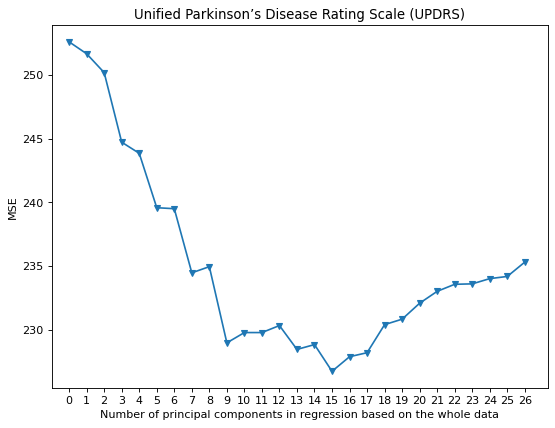

In [20]:
# Plot results   
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(np.abs(mse), '-v')
plt.xlabel('Number of principal components in regression based on the whole data')
plt.ylabel('MSE')
plt.title('Unified Parkinson’s Disease Rating Scale (UPDRS)')
plt.xlim(xmin=-1);
plt.xticks(np.arange(0,27, 1.0))
plt.show()

In [21]:
#compareing the resultant mse for the PCs numbered[9,15] 
abs(mse[9]) - abs(mse[15])

2.2321527713509965

In [22]:
mse_9 = -1*model_selection.cross_val_score(regr, X_reduced[:,:9], y.ravel(), cv=crossvalidation,
    scoring='neg_mean_squared_error')
mse_9

array([232.04010376, 223.66039165, 253.08497188, 207.68057318,
       228.43944705])

In [23]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (mse_9.mean(), mse_9.std()))

228.98 accuracy with a standard deviation of 14.65


In [24]:
## Amount of variance explained by adding each consecutive principal component:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)

array([ 40.5,  57.7,  67.4,  76.6,  83. ,  87.4,  90. ,  92.3,  94.1,
        95. ,  95.8,  96.5,  97.1,  97.7,  98.2,  98.6,  99. ,  99.4,
        99.7,  99.8,  99.9, 100. , 100. , 100. , 100. , 100. ])

In [25]:
#the amount variance explained up to the PC of number 9
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)[15]

98.75000000000003

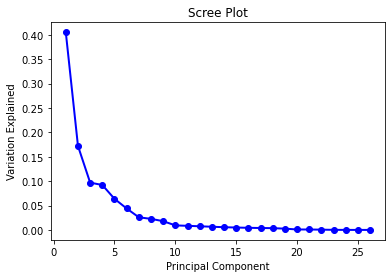

In [26]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variation Explained')
plt.show()

In [27]:
# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=2022)

In [28]:
pca2=PCA()

In [29]:
X_reduced_train = pca2.fit_transform(scale(X_train))[:,:9]
X_test_reduced = pca2.transform(scale(X_test))[:,:9]

regr2=LinearRegression()
regr2.fit(X_reduced_train,y_train)
pred = regr2.predict(X_test_reduced)

mean_squared_error(y_test, pred)

231.56575876227592

In [30]:
#cross-validation
#create the model 
regr3 = LinearRegression()
msee=[]
n = len(X_train)
pca3 = PCA()

#prepare the cross-validation procedure
crossvalidation = model_selection.KFold(n_splits=5, random_state=2022, shuffle=True)

# Calculate MSE with only the intercept (no principal components in regression)
score_constant = -1*model_selection.cross_val_score(regr3, np.ones((n,1)), y_train.ravel(), cv=crossvalidation,
 scoring='neg_mean_squared_error').mean()
msee.append(score_constant)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 27):
    score = -1*model_selection.cross_val_score(regr3, pca3.fit_transform(scale(X_train))[:,:i], y_train.ravel(), cv=crossvalidation,
    scoring='neg_mean_squared_error').mean()
    msee.append(score)

In [31]:
msee[9]

230.96130240695484

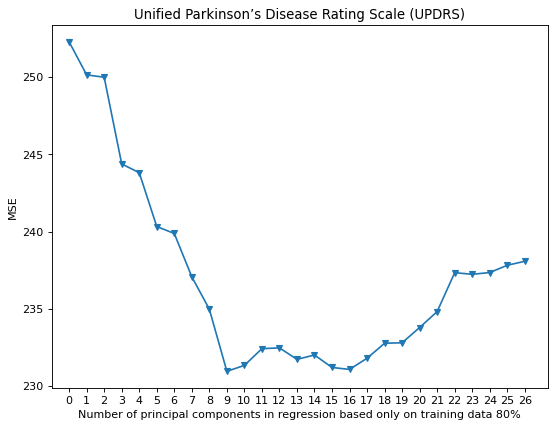

In [32]:
# Plot results  
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(msee, '-v')
plt.xlabel('Number of principal components in regression based only on training data 80%')
plt.ylabel('MSE')
plt.title('Unified Parkinson’s Disease Rating Scale (UPDRS)')
plt.xlim(xmin=-1);
plt.xticks(np.arange(0,27, 1.0))
plt.show()

In [33]:
msee[9]

230.96130240695484

In [34]:
pca4=PCA()
X_reduced_train = pca4.fit_transform(scale(X_train))[:,:9]
X_test_reduced = pca4.transform(scale(X_test))[:,:9]

regr4=LinearRegression()
regr4.fit(X_reduced_train,y_train)
pred = regr4.predict(X_test_reduced)

mean_squared_error(y_test, pred)

231.56575876227592

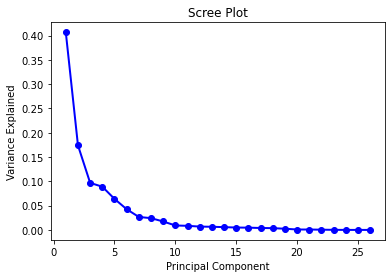

In [35]:
PC_values = np.arange(pca3.n_components_) + 1
plt.plot(PC_values, pca3.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [36]:
## Amount of variance explained by adding each consecutive principal component:
np.cumsum(np.round(pca3.explained_variance_ratio_, decimals=3)*100)[9]

95.10000000000002